In [12]:
import pandas as pd

movies_df = pd.read_csv("top_200.csv")
movies_df.head()


,Title,Lifetime Gross,Year
0,Avatar,"$2,923,706,026",2009
1,Avengers: Endgame,"$2,799,439,100",2019
2,Avatar: The Way of Water,"$2,320,250,281",2022
3,Titanic,"$2,264,750,694",1997
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015


In [13]:
import requests
import json
api_key = "d3ab6aa6"
from pprint import pprint
# Function to retrieve movie details from OMDb API
def get_movie_details(title):
    url = f"http://www.omdbapi.com/?t={title}&apikey={api_key}"  
    response = requests.get(url)
    data = response.json()
    return data

In [14]:
# List to store retrieved details
details_list = []

# Retrieve details for each movie
for title in movies_df['Title']:
    movie_details = get_movie_details(title)
    details_list.append(movie_details)

# Create DataFrame from details list
details_df = pd.DataFrame(details_list)

# Merge original dataset with retrieved details
final_df = pd.concat([movies_df, details_df], axis=1)

# Display final dataset
final_df.head()

,Title,Lifetime Gross,Year,Title,Year,Rated,Released,Runtime,Genre,Director,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,Avatar,"$2,923,706,026",2009,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,...,83,7.9,"1,384,939",tt0499549,movie,10 Feb 2016,"$785,221,649",N/A,N/A,True
1,Avengers: Endgame,"$2,799,439,100",2019,Avengers: Endgame,2019,PG-13,26 Apr 2019,181 min,"Action, Adventure, Drama","Anthony Russo, Joe Russo",...,78,8.4,"1,264,820",tt4154796,movie,30 Jul 2019,"$858,373,000",N/A,N/A,True
2,Avatar: The Way of Water,"$2,320,250,281",2022,Avatar: The Way of Water,2022,PG-13,16 Dec 2022,192 min,"Action, Adventure, Fantasy",James Cameron,...,67,7.6,"488,471",tt1630029,movie,28 Mar 2023,"$684,075,767",N/A,N/A,True
3,Titanic,"$2,264,750,694",1997,Titanic,1997,PG-13,19 Dec 1997,194 min,"Drama, Romance",James Cameron,...,75,7.9,"1,280,439",tt0120338,movie,01 Jun 2014,"$674,292,608",N/A,N/A,True
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015,Star Wars: Episode VII - The Force Awakens,2015,PG-13,18 Dec 2015,138 min,"Action, Adventure, Sci-Fi",J.J. Abrams,...,80,7.8,"973,458",tt2488496,movie,01 Apr 2016,"$936,662,225",N/A,N/A,True


In [15]:
print(final_df.columns)

Index(['Title', 'Lifetime Gross', 'Year', 'Title', 'Year', 'Rated', 'Released',
       'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
       'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production',
       'Website', 'Response'],
      dtype='object')


In [16]:
# Drop specified columns
columns_to_drop = ['Rated', 'Production', 'Website', 'Response', 'Poster', 'Director',
                   'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Released',
                   'Country', 'Awards', 'Runtime', 'Plot', 'Writer', 'Genre', 'Language', 'Ratings']
final_df.drop(columns=columns_to_drop, inplace=True)

# Drop duplicated columns
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

# Create a new DataFrame with the modified columns
new_dataset = final_df.copy()

# Display the new DataFrame
new_dataset.head(10)


,Title,Lifetime Gross,Year,Actors,Metascore,imdbRating
0,Avatar,"$2,923,706,026",2009,"Sam Worthington, Zoe Saldana, Sigourney Weaver",83,7.9
1,Avengers: Endgame,"$2,799,439,100",2019,"Robert Downey Jr., Chris Evans, Mark Ruffalo",78,8.4
2,Avatar: The Way of Water,"$2,320,250,281",2022,"Sam Worthington, Zoe Saldana, Sigourney Weaver",67,7.6
3,Titanic,"$2,264,750,694",1997,"Leonardo DiCaprio, Kate Winslet, Billy Zane",75,7.9
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015,"Daisy Ridley, John Boyega, Oscar Isaac",80,7.8
5,Avengers: Infinity War,"$2,052,415,039",2018,"Robert Downey Jr., Chris Hemsworth, Mark Ruffalo",68,8.4
6,Spider-Man: No Way Home,"$1,921,847,111",2021,"Tom Holland, Zendaya, Benedict Cumberbatch",71,8.2
7,Jurassic World,"$1,671,537,444",2015,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins",59,6.9
8,The Lion King,"$1,663,079,059",2019,"Matthew Broderick, Jeremy Irons, James Earl Jones",88,8.5
9,The Avengers,"$1,520,538,536",2012,"Robert Downey Jr., Chris Evans, Scarlett Johan...",69,8.0


In [17]:
# Split the 'Actors' column by comma and take the first element
main_actors = final_df['Actors'].str.split(',').str[0]

# Create a new column in the DataFrame with the main actors
final_df['Main Actor'] = main_actors

# Drop the original 'Actors' column if needed
final_df.drop(columns=['Actors'], inplace=True)

# Display the DataFrame with the main actors
final_df.head(10)

,Title,Lifetime Gross,Year,Metascore,imdbRating,Main Actor
0,Avatar,"$2,923,706,026",2009,83,7.9,Sam Worthington
1,Avengers: Endgame,"$2,799,439,100",2019,78,8.4,Robert Downey Jr.
2,Avatar: The Way of Water,"$2,320,250,281",2022,67,7.6,Sam Worthington
3,Titanic,"$2,264,750,694",1997,75,7.9,Leonardo DiCaprio
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015,80,7.8,Daisy Ridley
5,Avengers: Infinity War,"$2,052,415,039",2018,68,8.4,Robert Downey Jr.
6,Spider-Man: No Way Home,"$1,921,847,111",2021,71,8.2,Tom Holland
7,Jurassic World,"$1,671,537,444",2015,59,6.9,Chris Pratt
8,The Lion King,"$1,663,079,059",2019,88,8.5,Matthew Broderick
9,The Avengers,"$1,520,538,536",2012,69,8.0,Robert Downey Jr.


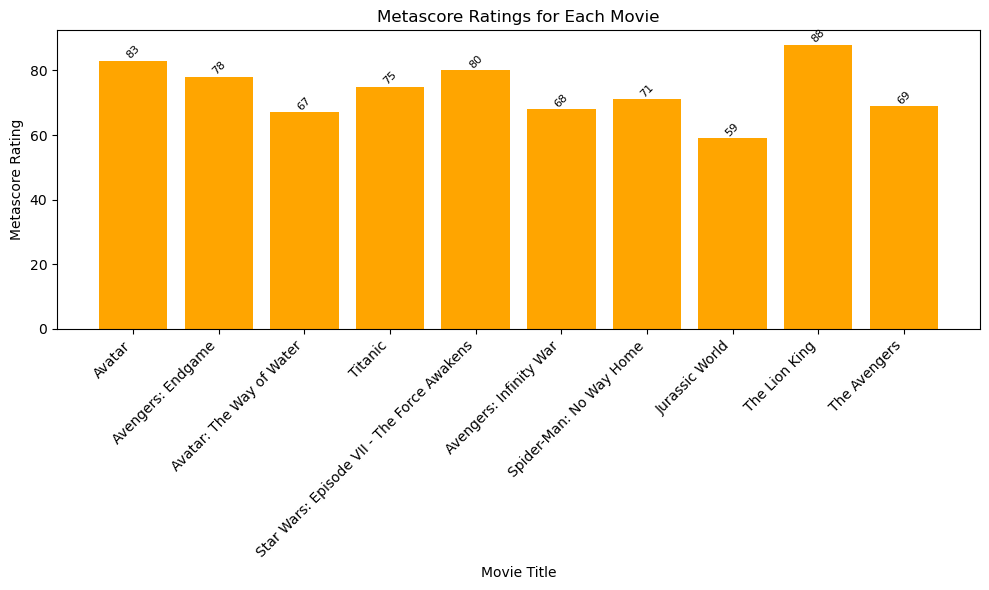

In [23]:
import matplotlib.pyplot as plt

# Data
titles = ['Avatar', 'Avengers: Endgame', 'Avatar: The Way of Water', 'Titanic', 'Star Wars: Episode VII - The Force Awakens', 'Avengers: Infinity War', 'Spider-Man: No Way Home', 'Jurassic World', 'The Lion King', 'The Avengers']
metascore = [83, 78, 67, 75, 80, 68, 71, 59, 88, 69]

# Plotting
plt.figure(figsize=(10,6))
plt.bar(titles, metascore, color='orange')
plt.xlabel('Movie Title')
plt.ylabel('Metascore Rating')
plt.title('Metascore Ratings for Each Movie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate main actors on the plot
for i in range(len(titles)):
    plt.text(titles[i], metascore[i],str(metascore[i]) , ha='center', va='bottom', rotation=45, fontsize=8)

plt.show()

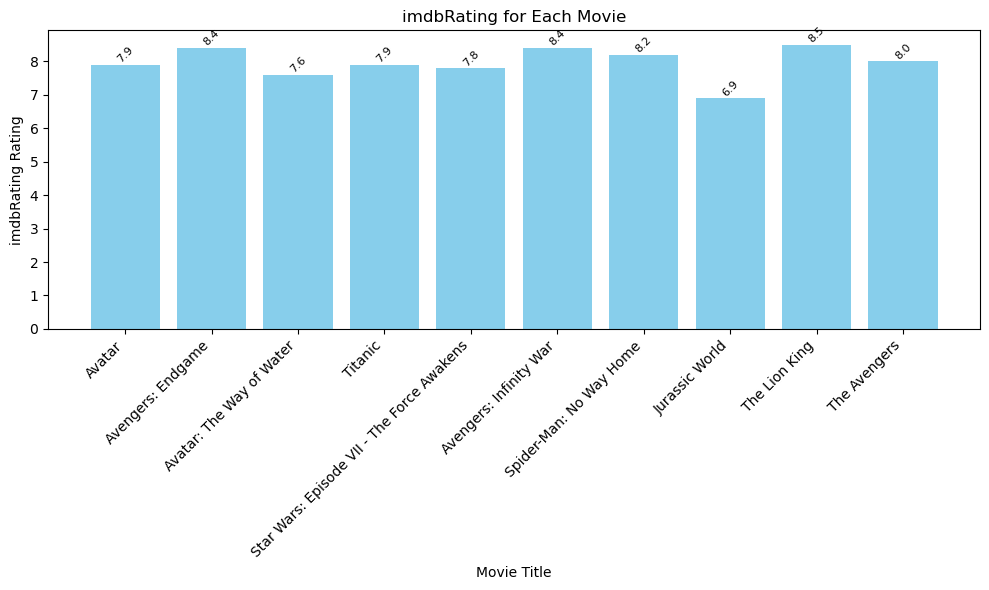

In [20]:
import matplotlib.pyplot as plt

# Data
titles = ['Avatar', 'Avengers: Endgame', 'Avatar: The Way of Water', 'Titanic', 'Star Wars: Episode VII - The Force Awakens', 'Avengers: Infinity War', 'Spider-Man: No Way Home', 'Jurassic World', 'The Lion King', 'The Avengers']
imdbRating = [7.9, 8.4, 7.6, 7.9, 7.8, 8.4, 8.2, 6.9, 8.5, 8.0]

# Plotting
plt.figure(figsize=(10,6))
plt.bar(titles, imdbRating, color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('imdbRating Rating')
plt.title('imdbRating for Each Movie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate main actors on the plot
for i in range(len(titles)):
    plt.text(titles[i], imdbRating[i],str(imdbRating[i]), ha='center', va='bottom', rotation=45, fontsize=8)

plt.show()
